Алгоритм метода Ньютона для оптимизации функции можно описать следующим образом:

1. Инициализация: Задать начальное значение переменных `x0`.
2. Итерационный процесс:
   a. Вычислить значение функции в текущей точке `x`: `fx = f(x)`.
   b. Вычислить градиент функции в текущей точке: `grad = df(x)`.
   c. Проверить условие остановки. Если норма градиента `||grad||` меньше заданного порогового значения `tol`, то выйти из итерационного процесса и вернуть текущую точку `x` и путь оптимизации.
   d. Вычислить гессиан функции в текущей точке: `hessian = ddf(x)`.
   e. Вычислить изменение переменных `x` как решение системы линейных уравнений: `dx = -np.linalg.solve(hessian, grad)`.
   f. Обновить переменные `x`: `x = x + dx`.
   g. Добавить текущую точку `x` в путь оптимизации.
   h. Перейти к шагу (a).
3. Вывод результата: Вернуть последнюю найденную точку `x` и путь оптимизации.

Метод Ньютона использует градиент и гессиан функции для нахождения оптимального направления движения в пространстве переменных. Он стремится к нахождению точки, в которой градиент равен нулю (минимум или максимум функции).

В данной реализации метода Ньютона также используется проверка нормы градиента для определения условия остановки, то есть прекращения итераций, если достигнута достаточная близость к минимуму функции.

Минимум функции: [3.99797216 6.99593773]
Значение функции в минимуме: 4.750118479185318e-10


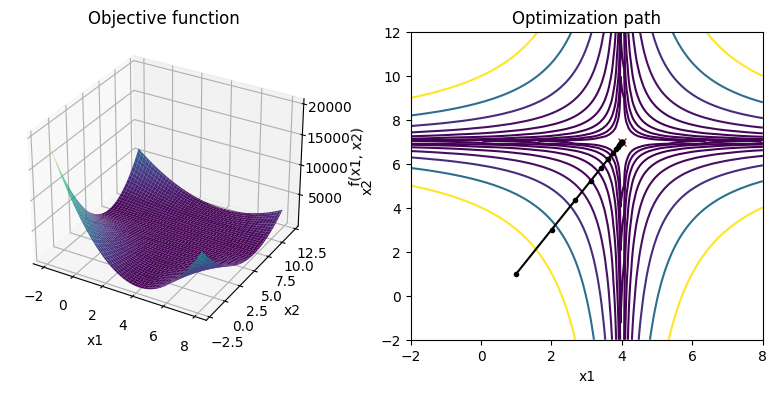

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    # Целевая функция
    x1, x2 = x
    return 7 * (x1 - 4) ** 2 * (x2 - 7) ** 2

def df(x, eps=1e-6):
    # Градиент целевой функции
    x1, x2 = x
    df_x1 = (f([x1 + eps, x2]) - f([x1 - eps, x2])) / (2 * eps)
    df_x2 = (f([x1, x2 + eps]) - f([x1, x2 - eps])) / (2 * eps)
    return np.array([df_x1, df_x2])

def ddf(x, eps=1e-6):
    # Гессиан целевой функции
    x1, x2 = x
    ddf_x11 = (f([x1 + eps, x2]) - 2 * f([x1, x2]) + f([x1 - eps, x2])) / (eps ** 2)
    ddf_x22 = (f([x1, x2 + eps]) - 2 * f([x1, x2]) + f([x1, x2 - eps])) / (eps ** 2)
    ddf_x12 = (f([x1 + eps, x2 + eps]) - f([x1 + eps, x2 - eps]) - f([x1 - eps, x2 + eps]) + f([x1 - eps, x2 - eps])) / (4 * eps ** 2)
    return np.array([[ddf_x11, ddf_x12], [ddf_x12, ddf_x22]])

def newton_optimizer(f, df, ddf, x0, tol=1e-6, max_iter=100):
    """
    Реализация оптимизационного метода Ньютона для минимизации функции f(x1,x2) = 7 * (x1 - 4)**2 * (x2 - 7)**2.
    """
    x = x0
    path = [x]
    for i in range(max_iter):
        fx = f(x)
        grad = df(x)
        if np.linalg.norm(grad) < tol:
            return x, path
        hessian = ddf(x)
        dx = -np.linalg.solve(hessian, grad)
        x = x + dx
        path.append(x)
    return x, path

def main():
    x0 = np.array([1.0, 1.0])
    min_x, path = newton_optimizer(f, df, ddf, x0)
    print("Минимум функции:", min_x)
    print("Значение функции в минимуме:", f(min_x))
    
    # График функции
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    x1_range = np.linspace(-2, 8, 100)
    x2_range = np.linspace(-2, 12, 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    f_grid = f([x1_grid, x2_grid])
    ax.plot_surface(x1_grid, x2_grid, f_grid, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title('Objective function')

    # График пути оптимизации
    ax2 = fig.add_subplot(122)
    ax2.contour(x1_grid, x2_grid, f_grid, levels=np.logspace(-1, 3, 10), cmap='viridis')
    ax2.plot(min_x[0], min_x[1], marker='x', color='r')
    path = np.array(path)
    ax2.plot(path[:, 0], path[:, 1], marker='.', color='k')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Optimization path')

    plt.show()

if __name__ == '__main__':
    main()
